# PAP2 V251: Statistik des radioaktiven Zerfalls

Aufgabe 1: Importieren und grafische Dartstellung der Messdaten

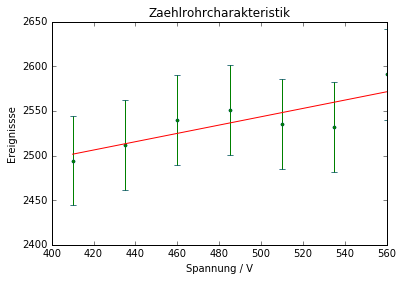

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#Zaehlrohrspannung:
U=np.array([410,435,460,485,510,535,560])
#gezaehlte Ereignisse
N=np.array([2494,2512,2540,2551,2535,2532,2591])
Fehler_N=np.sqrt(N)

plt.errorbar(U, N, Fehler_N, fmt=".")
plt.xlabel('Spannung / V')
plt.ylabel('Ereignissse')
plt.title('Zaehlrohrcharakteristik')

from scipy.optimize import curve_fit
def linear(x,a,b):
    return a*x+b
popt, pcov=curve_fit(linear, U, N)

plt.errorbar(U, N, Fehler_N, fmt=".")
plt.xlabel('Spannung / V')
plt.ylabel('Ereignissse')
plt.title('Zaehlrohrcharakteristik')
plt.plot(U, linear(U,*popt))
plt.savefig("figures/Zaehlrohrcharakteristik.pdf", format="pdf")

Aufgabe 2: Plateaubereich des Zählrohres
- Rechnung in Laborbuch

Aufgabe 3: Auswertung Daten mit hoher mittlerer Ereigniszahl

In [8]:
anzahl, haeufigkeit=np.loadtxt(’data/Dateiname.dat’, unpack=True)
fehler=np.sqrt(haeufigkeit)

plt.errorbar(anzahl, haeufigkeit, fehler, fmt=".")
plt.xlabel('Anzahl der Zerfaelle pro Zeiteinheit / 1/s ')
plt.ylabel('Haeufigkeit')
plt.title('Statistik des radioaktiven Zerfalls')

from numpy import exp, pi, sqrt
def gaussian(x, A, mu, sig): #A: Flaeche der Gaussfunktion
    return A/(2*pi*sqrt(sig))*exp(-(x-mu)**2/2/sig**2)

popt, pcov=curve_fit(gaussian,anzahl[12:-12], haeufigkeit[12:-12], p0=[2000,75,8],sigma=fehler[12:-12])

from scipy.special import gamma
def poisson(x, A_p, mu_p):
    return A_p*exp(-mu_p)*mu_p**x/gamma(x+1)
popt_p, pcov_p = curve_fit(poisson, anzahl[12:-12],
haeufigkeit[12:-12], p0=[2000, 75], sigma=fehler[12:-12])

plt.errorbar(anzahl,haeufigkeit,fehler, fmt=".",label=’Messung’)
plt.xlabel(’Anzahl der Zerfaelle pro Zeiteinheit 1/s ’)
plt.ylabel(’Haeufigkeit’)
plt.title(’Statistik des radioaktiven Zerfalls’)
x=np.linspace(40,110, 100)
plt.plot(x, gaussian(x,*popt), label=’Gauss’)
plt.plot(x, poisson(x,*popt_p), label=’Poisson’,linestyle=’:’)
plt.legend()
plt.savefig("figures/poisson_vs_gaussian.pdf", format="pdf")


print("Gaussfit:")
print("A=",popt[0], ", Standardfehler=", np.sqrt(pcov[0][0]))
print("mu=",popt[1], ", Standardfehler=", np.sqrt(pcov[1][1]))
print("sig=",popt[2], ", Standardfehler=", np.sqrt(pcov[2][2]))
print("Poissonfit:")
print("A_p=",popt_p[0], ", Standardfehler=", sqrt(pcov_p[0][0]))
print("mu_p=",popt_p[1], ", Standardfehler=", sqrt(pcov_p[1][1]))


#Gauss:
chi2_g=np.sum((gaussian(anzahl[12:-12],*popt)
-haeufigkeit[12:-12])**2/fehler[12:-12]**2)
dof_g=len(anzahl[12:-12])-3 #dof:degrees of freedom, Freiheitsgrad
chi2_red_g=chi2_g/dof_g
print("chi2_g=", chi2_g)
print("chi2_red_g=",chi2_red_g)
#Poisson:
chi2_p=np.sum((poisson(anzahl[12:-12],*popt_p)
-haeufigkeit[12:-12])**2/fehler[12:-12]**2)
dof_p=len(anzahl[12:-12])-2 #poisson hat nur 2 Parameter
chi2_red_p=chi2_p/dof_p
print("chi2_p=", chi2_p)
print("chi2_red_p=",chi2_red_p)


from scipy.stats import chi2
#Gauss:
prob_g=round(1-chi2.cdf(chi2_g,dof_g),2)*100
#Poisson:
prob_p=round(1-chi2.cdf(chi2_p,dof_p),2)*100
print("Wahrscheinlichkeit Gauss=", prob_g,"%")
print("Wahrscheinlichkeit Poisson=", prob_p,"%")





SyntaxError: invalid character in identifier (<ipython-input-8-d5cda90594c2>, line 1)

Aufgabe 4: Auswertung der Daten mit kleiner mittlerer Ereigniszahl